# Map Projections and Dot Maps

Let's read in John Snow's cholera data.

In [2]:
import pandas as pd

directory = "https://datasci112.stanford.edu/data/cholera"
df_deaths = pd.read_csv(f"{directory}/deaths.csv")
df_deaths

,Longitude,Latitude,Count
0,-0.137930,51.513418,3
1,-0.137883,51.513361,2
2,-0.137853,51.513317,1
3,-0.137812,51.513262,1
4,-0.137767,51.513204,4
...,...,...,...
245,-0.137108,51.514526,3
246,-0.137065,51.514706,2
247,-0.138474,51.512311,1
248,-0.138123,51.511998,1


- One way to visualize this data is to make a scatterplot of the deaths using latitude and longitude. This is a crude approximation.

<Axes: xlabel='Longitude', ylabel='Latitude'>

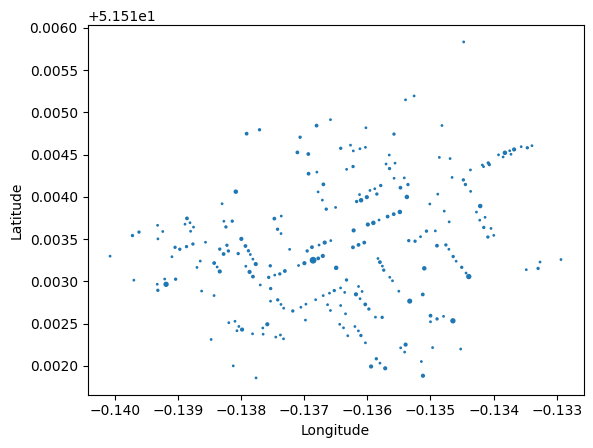

In [3]:
df_deaths.plot.scatter(x="Longitude", y="Latitude", s="Count")

## Map Projections

- For a geospatial daata, we should use a proper map projection.
- `Gepoandas` is a Python library for reading and processing geospatial data. It provides a data structure called `GeoDataFrame`, which is the analog of Panda's `DataFrame`

In [4]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 3.5 MB/s  0:00:06m 3.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 4.5 MB/s  0:00:004.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.8 MB/s  0:00:00m 51.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [geopandas]━ 3/4 [geopandas]


The map projection is specified using a Coordinate Reference System (or CRS). Every projection has a CRS code. For example:

the Mercator projection has code EPSG:4326
the Robinson projection has code ESRI:53030
You can look up the code for different projections here.https://epsg.io/

In [6]:
import geopandas as gpd

gdf_deaths = gpd.GeoDataFrame(
    df_deaths,
    geometry=gpd.points_from_xy(
        x=df_deaths["Longitude"],
        y=df_deaths["Latitude"]
    ),
    crs="EPSG:4326"
)

gdf_deaths

,Longitude,Latitude,Count,geometry
0,-0.137930,51.513418,3,POINT (-0.13793 51.51342)
1,-0.137883,51.513361,2,POINT (-0.13788 51.51336)
2,-0.137853,51.513317,1,POINT (-0.13785 51.51332)
3,-0.137812,51.513262,1,POINT (-0.13781 51.51326)
4,-0.137767,51.513204,4,POINT (-0.13777 51.5132)
...,...,...,...,...
245,-0.137108,51.514526,3,POINT (-0.13711 51.51453)
246,-0.137065,51.514706,2,POINT (-0.13706 51.51471)
247,-0.138474,51.512311,1,POINT (-0.13847 51.51231)
248,-0.138123,51.511998,1,POINT (-0.13812 51.512)


<Axes: >

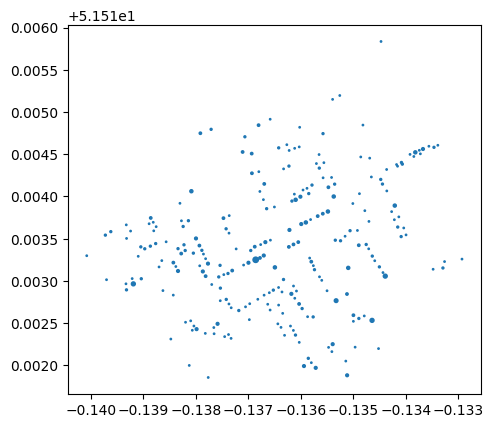

In [7]:
gdf_deaths.plot(markersize="Count")

We can change the CRS using .to_crs(). For example, to map the same data using the Robinson projection instead, would do the following.

<Axes: >

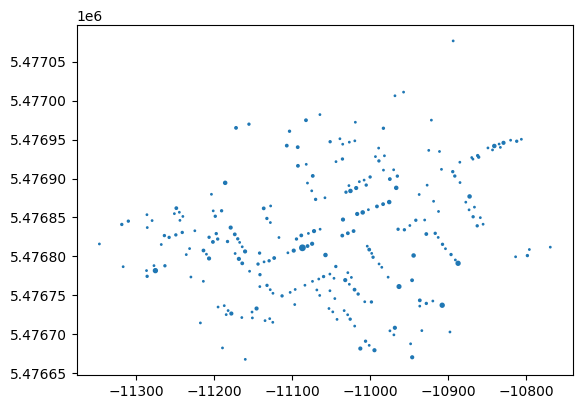

In [8]:
gdf_deaths.to_crs("ESRI:53030").plot(markersize="Count")

## Adding the Pumps

First, we read in the pumps data.

In [9]:
df_pumps = pd.read_csv(f"{directory}/pumps.csv")
df_pumps

,Name,Longitude,Latitude
0,Broad St Pump,-0.136668,51.513341
1,Little Marlborough St Pump,-0.139586,51.513876
2,Marlborough Mews Pump,-0.139671,51.514906
3,Dean St Pump,-0.131630,51.512354
4,Rupert St Pump,-0.133594,51.512139
5,Bridle St Pump,-0.135919,51.511542
6,Tighborne St Pump,-0.133962,51.510019
7,Warwick St Pump,-0.138199,51.511295


In [11]:
gdf_pumps = gpd.GeoDataFrame(
    df_pumps,
    geometry=gpd.points_from_xy(
        x=df_pumps["Longitude"],
        y=df_pumps["Latitude"]
    ),
    crs="EPSG:4326"
)

gdf_pumps

,Name,Longitude,Latitude,geometry
0,Broad St Pump,-0.136668,51.513341,POINT (-0.13667 51.51334)
1,Little Marlborough St Pump,-0.139586,51.513876,POINT (-0.13959 51.51388)
2,Marlborough Mews Pump,-0.139671,51.514906,POINT (-0.13967 51.51491)
3,Dean St Pump,-0.131630,51.512354,POINT (-0.13163 51.51235)
4,Rupert St Pump,-0.133594,51.512139,POINT (-0.13359 51.51214)
5,Bridle St Pump,-0.135919,51.511542,POINT (-0.13592 51.51154)
6,Tighborne St Pump,-0.133962,51.510019,POINT (-0.13396 51.51002)
7,Warwick St Pump,-0.138199,51.511295,POINT (-0.1382 51.5113)


<Axes: >

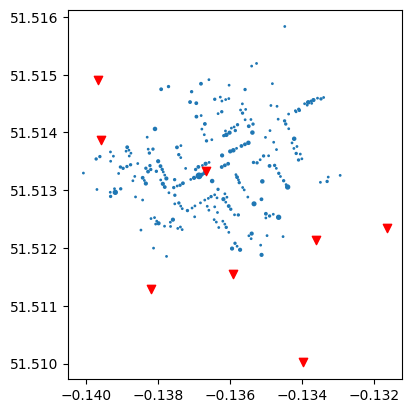

In [13]:
ax = gdf_deaths.plot(markersize="Count")
gdf_pumps.plot(ax=ax, color="red", marker="v")

## Adding a Background Map

We want to overlay these points on a map of London. To do this, we can use a library called `contextily`, which fetches web map tiles from `OpenStreetMap`.

In [14]:
!pip install contextily -q

OpenStreetMap uses a specific CRS called "Web Mercator", whose code is EPSG:3857. So we need to convert all of our data to this CRS.

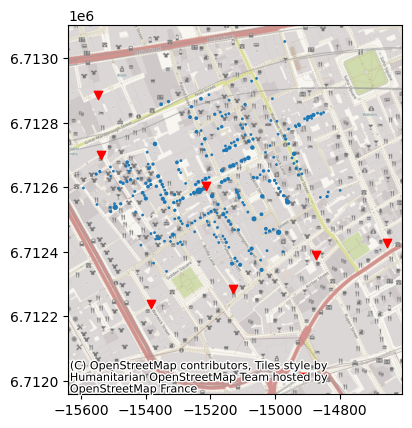

In [15]:
import contextily as cx

ax = gdf_deaths.to_crs("EPSG:3857").plot(markersize="Count")
gdf_pumps.to_crs("EPSG:3857").plot(ax=ax, color="red", marker="v")

# Add tiles from OpenStreetMap to map
cx.add_basemap(ax)